In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load Dataset

In [2]:
data = pd.read_csv('ad_table.csv', parse_dates=['date'])
data.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
date                  2115 non-null datetime64[ns]
shown                 2115 non-null int64
clicked               2115 non-null int64
converted             2115 non-null int64
avg_cost_per_click    2115 non-null float64
total_revenue         2115 non-null float64
ad                    2115 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 115.7+ KB


In [4]:
data.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757
min,0.000000,0.000000,0.000000,0.000000,-200.150000
25%,28030.500000,744.000000,18.000000,0.760000,235.470000
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000


In [16]:
data.date.max()-data.date.min()

Timedelta('52 days 00:00:00')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
date                  2115 non-null datetime64[ns]
shown                 2115 non-null int64
clicked               2115 non-null int64
converted             2115 non-null int64
avg_cost_per_click    2115 non-null float64
total_revenue         2115 non-null float64
ad                    2115 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 115.7+ KB


# Question 1
If you had to identify the 5 best ad groups, which ones would they be? Which metric did you choose to identify the best ad groups? Why? Explain the pros of your metric as well as the possible cons.

In [19]:
# calculate the profit: total_revenue - total_cost
data['profit'] = data['total_revenue'] - data['avg_cost_per_click'] * data['clicked']
data.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,profit
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,-1463.48
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,-1591.75
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,-1018.28
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,-1953.94
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,-1816.55


In [20]:
data.profit.sort_values(ascending=False).head()

664    16067.22
678    15188.86
669    10716.84
652     9594.57
635     9041.74
Name: profit, dtype: float64

In [21]:
data.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,profit
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,-1463.48
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,-1591.75
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,-1018.28
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,-1953.94
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,-1816.55


To identify the 5 best ad groups, there are a lot of different metrics to be used, such as the average click-through-rate, or the average conversion-rate. Here, since the revenue and cost information are given, we will simply use the net profit per shown ad (or unit profit) to find the 5 best ad groups.

In [22]:
def unit_profit(df):
    """ function to calculate the unit profit """
    profit = df['profit'].sum()
    shown = df['shown'].sum()
    val = profit / shown
    
    return val

In [27]:
grouped = data.groupby('ad').apply(unit_profit).reset_index()
grouped.head()

,ad,0
0,ad_group_1,-0.027427
1,ad_group_10,-0.014020
2,ad_group_11,-0.066531
3,ad_group_12,-0.040144
4,ad_group_13,-0.022122


In [32]:
grouped = grouped.rename(columns={0: 'unit_profit'})


In [35]:
grouped = grouped.sort_values(by='unit_profit', ascending=False)
grouped.size

80

Based on above calculation, we can see the the top 5 best ad groups are: `ad_group_16`, `ad_group_2`, `ad_group_14`, `ad_group_31`, `ad_group_27`. 

# Question 2
For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

In [34]:
data.date.max()

Timestamp('2015-11-22 00:00:00')

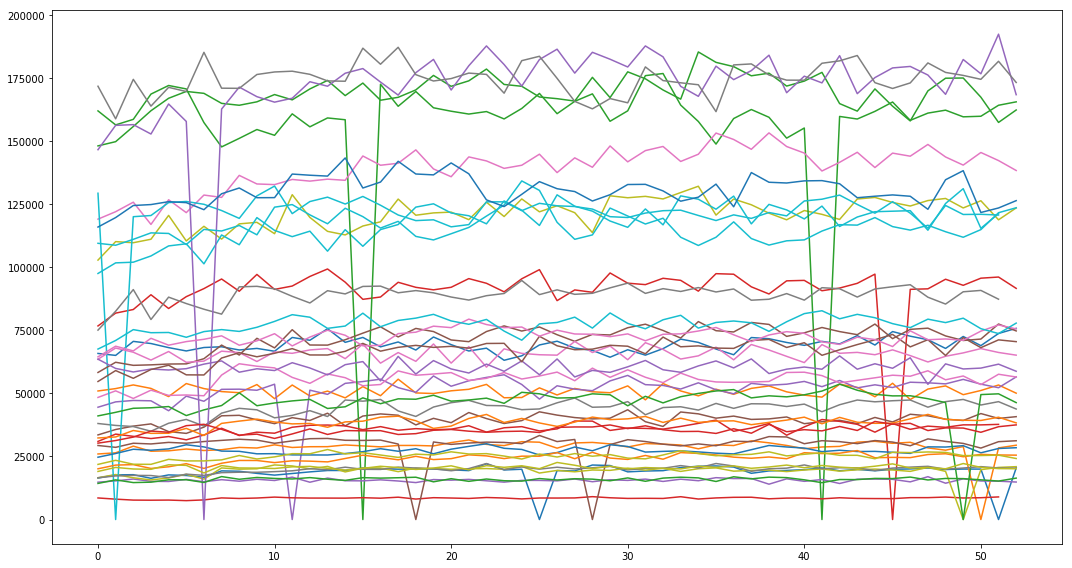

In [37]:
# visualization
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(1, 41):
    ad_group = 'ad_group_' + str(i)
    vals = data[data['ad'] == ad_group].sort_values(by='date')['shown'].values
    ax.plot(vals, label=ad_group)
# ax.legend()
plt.tight_layout()
plt.show()

Clearly, this is a time series prediction problem. R provides a series of good tools to fit time series model and make predictions. This will be finished a little bit later since I am not so familiar with time series modeling in Python.

In this file, the author provides a another solution in Python, you can take a look if you like it. [Online Reference Link](https://github.com/stasi009/TakeHomeDataChallenges/blob/master/20.AdsAnalysis/analyze_ads.py)

# Question 3
Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.

In [43]:
data.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,profit
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,-1463.48
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,-1591.75
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,-1018.28
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,-1953.94
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,-1816.55


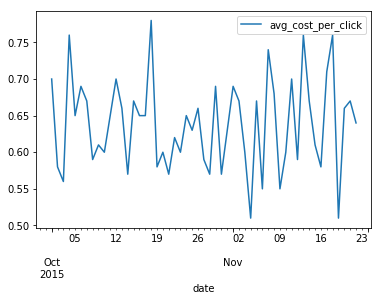

In [68]:
data[data.ad=='ad_group_2'].plot(x='date', y = 'avg_cost_per_click')

In [42]:
data.ad.unique()

array(['ad_group_1', 'ad_group_2', 'ad_group_3', 'ad_group_4',
       'ad_group_5', 'ad_group_6', 'ad_group_7', 'ad_group_8',
       'ad_group_9', 'ad_group_10', 'ad_group_11', 'ad_group_12',
       'ad_group_13', 'ad_group_14', 'ad_group_15', 'ad_group_16',
       'ad_group_17', 'ad_group_18', 'ad_group_19', 'ad_group_20',
       'ad_group_21', 'ad_group_22', 'ad_group_23', 'ad_group_24',
       'ad_group_25', 'ad_group_26', 'ad_group_27', 'ad_group_28',
       'ad_group_29', 'ad_group_30', 'ad_group_31', 'ad_group_32',
       'ad_group_33', 'ad_group_34', 'ad_group_35', 'ad_group_36',
       'ad_group_37', 'ad_group_38', 'ad_group_39', 'ad_group_40'],
      dtype=object)

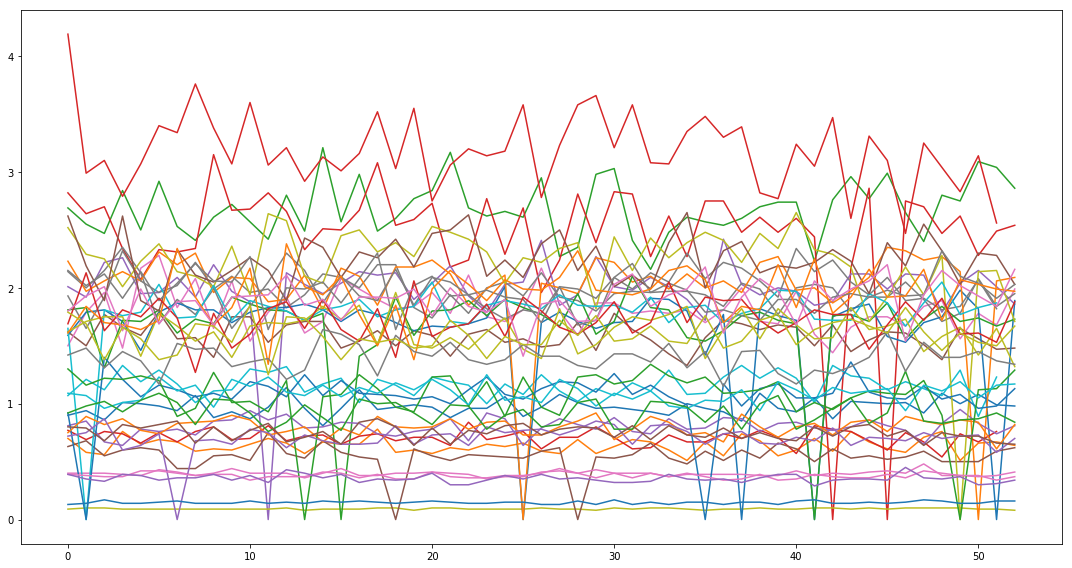

In [40]:
# visualization
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(1, data.ad.nunique()):
    ad_group = 'ad_group_' + str(i)
    vals = data[data['ad'] == ad_group].sort_values(by='date')['avg_cost_per_click'].values
    ax.plot(vals, label=ad_group)
# ax.legend()
plt.tight_layout()
plt.show()

In [53]:
def cost_stats(df):
    """ function to calculate the avg_cost_per_click trend """
    tmp = df.sort_values(by='date')['avg_cost_per_click'].values
    ratio = tmp[1:] / tmp[:-1]
    
    ratio_mean = np.mean(ratio)
    ratio_min = np.min(ratio)
    ratio_25 = np.percentile(ratio, 25)
    ratio_50 = np.percentile(ratio, 50)
    ratio_75 = np.percentile(ratio, 75)
    ratio_max = np.max(ratio)
    
    return pd.Series([ratio_mean, ratio_min, ratio_25, ratio_50, ratio_75, ratio_max], 
                     index=['mean', 'min', '25%', '50%', '75%', 'max'])

stats = data.groupby('ad').apply(cost_stats)
stats.head()

,mean,min,25%,50%,75%,max
ad,,,,,,
ad_group_1,1.007436,0.822430,0.930747,0.989999,1.094223,1.282353
ad_group_10,1.011576,0.689922,0.920666,0.976923,1.105323,1.382022
ad_group_11,inf,0.000000,0.957944,1.002941,1.052941,inf
ad_group_12,inf,0.000000,0.945670,1.005051,1.060455,inf
ad_group_13,inf,0.000000,0.958716,1.000015,1.071825,inf


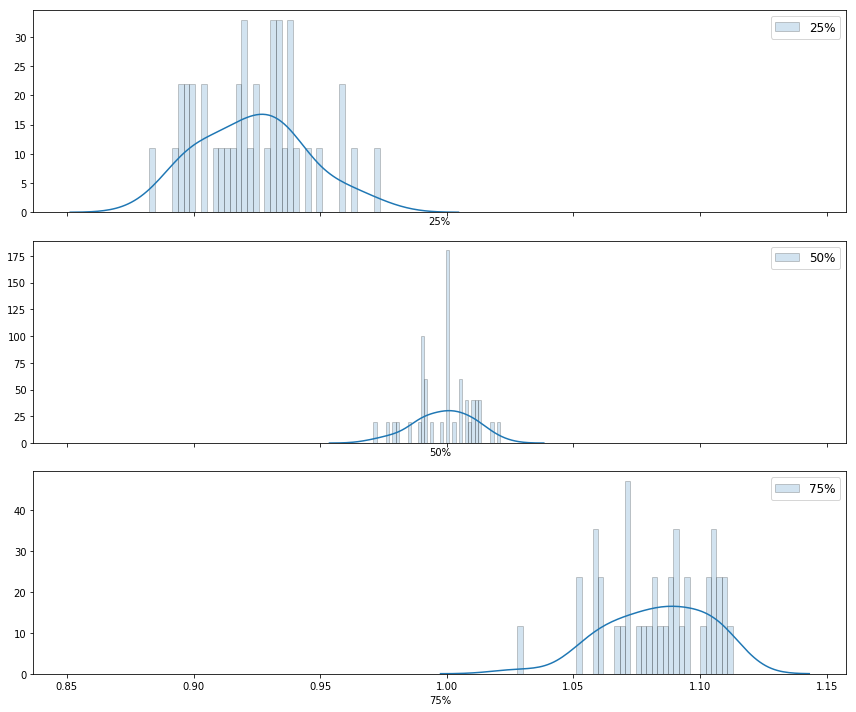

In [54]:
# visualization
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=True)
sns.distplot(stats['25%'], bins=40, ax=ax[0], label='25%', hist_kws=hist_kws)
ax[0].legend(fontsize=12)
sns.distplot(stats['50%'], bins=40, ax=ax[1], label='50%', hist_kws=hist_kws)
ax[1].legend(fontsize=12)
sns.distplot(stats['75%'], bins=40, ax=ax[2], label='75%', hist_kws=hist_kws)
ax[2].legend(fontsize=12)
plt.tight_layout()
plt.show()

Based on above analysis, we can manually set a series cutoff thresholds to identify the cluster of **going up**, **flat**, and **going down**.

In [59]:
data.groupby('ad')['date','avg_cost_per_click']

ValueError: view limit minimum -36795.349500000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001638FE5FC80> (for post_execute):


ValueError: view limit minimum -36795.349500000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36795.349500000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units